# CDMA Code Generation - Part I

In this notebook, we will cover the first question of the TP focusing on code generation for CDMA sequences.

**Objectives:**
1. Generate Walsh-Hadamard codes for specified spreading factors (SF).
2. Generate binary random sequences of length SF.
3. Generate PN sequences using specified recurrence relations.

**Background:**
- **CDMA (Code Division Multiple Access)**: A multiple access technique where each user signal is spread by a code sequence before transmission. Each user gets a unique code.
- **Spreading Factor (SF)**: Length of the code sequence that spreads one symbol.
- **Walsh-Hadamard Codes**: Orthogonal codes obtained from Hadamard matrices.
- **Binary Random Sequences**: Random sequences with values {+1,-1}.
- **PN (Pseudo-Noise) Sequences**: Deterministic sequences with "noise-like" properties, often generated by linear feedback shift registers (LFSRs).




## 1_1. Walsh-Hadamard Codes

Walsh-Hadamard sequences can be generated using Hadamard matrices. A Hadamard matrix `H_n` of order `n` is defined recursively:
- `H_1 = [1]`
- For `n > 1`,
  \[
    H_{2n} = \begin{bmatrix}
      H_n & H_n \\
      H_n & -H_n
    \end{bmatrix}
  \]

Each row of the Hadamard matrix forms one Walsh code. For a given spreading factor `SF`, we generate an `SF x SF` Hadamard matrix and each row can be used as a code.



In [15]:
import numpy as np

def hadamard_matrix(n):
    """
    Generate a Hadamard matrix of order n (n must be a power of 2).
    """
    if n == 1:
        return np.array([[1]])
    else:
        H = hadamard_matrix(n // 2)
        return np.block([[H, H],
                         [H, -H]])

# Generate Walsh-Hadamard codes for SF=4, 16, 128
SF_values = [4, 16, 128]
for SF in SF_values:
    H = hadamard_matrix(SF)
    print(f"Walsh-Hadamard Codes (SF={SF}):\n", H, "\n")


Walsh-Hadamard Codes (SF=4):
 [[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]] 

Walsh-Hadamard Codes (SF=16):
 [[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1]
 [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1]
 [ 1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1]
 [ 1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1]
 [ 1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1]
 [ 1 -1  1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1 -1]
 [ 1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1]
 [ 1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1 -1 -1  1]] 

Walsh-Hadamard Codes (SF=128):
 [[ 1  1  1 ...  1  1  1]


## 1_2. Binary Random Sequences

Binary random sequences are simple random sequences of length `SF` with values either +1 or -1. These are not guaranteed to be orthogonal, but are useful for simulation and testing.


In [16]:
def binary_random_sequence(SF):
    """
    Generate a binary random sequence of length SF with values +1 or -1.
    """
    return np.random.choice([+1, -1], size=SF)

# Generate binary random sequences for SF=4,16,128
for SF in SF_values:
    seq = binary_random_sequence(SF)
    print(f"Binary random sequence (SF={SF}): {seq}")


Binary random sequence (SF=4): [-1  1  1 -1]
Binary random sequence (SF=16): [ 1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1]
Binary random sequence (SF=128): [-1  1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1
  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1
 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1
  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1
  1  1 -1 -1  1  1  1  1]


## 1_3. PN Sequences

PN (Pseudo-Noise) sequences are deterministic sequences that resemble random sequences. They are often generated using linear feedback shift registers (LFSRs).

**Given Algorithms:**

- **PN Sequence 1**:
  \[
    c_n = (c_{n-1} + c_{n-4}) \mod 2
  \]

- **PN Sequence 2**:
  \[
    c_n = (c_{n-3} + c_{n-4}) \mod 2
  \]

For both, we generate a sequence of length 15. We must specify an initial state for the LFSR. Let's choose `[1, 0, 0, 1]` as an initial state example.


In [17]:
def generate_pn_sequence(length, taps, initial_state):
    """
    Generate a PN sequence using an LFSR approach.

    :param length: length of the PN sequence to generate
    :param taps: indices that define which bits to XOR for the new bit.
                 The state is considered right-to-left, with state[-1] as the output bit.
                 For example, taps=[1,4] means c_n depends on the last bit and the 4th-last bit.
    :param initial_state: list/array of bits (0 or 1) for initialization
    :return: PN sequence as a numpy array of +1/-1
    """
    state = initial_state.copy()
    seq = []
    reg_len = len(state)

    for _ in range(length):
        seq.append(state[-1])  # output bit is the last bit in the register
        # Compute new bit as XOR of the specified taps
        new_bit = 0
        for t in taps:
            new_bit ^= state[-t]  # e.g., state[-1], state[-4], etc.

        # Shift the register to the right and insert new_bit at the front
        state = [new_bit] + state[:-1]

    # Convert from {0,1} to {+1,-1}
    seq = np.array(seq)
    seq = 2*seq - 1  # 0 -> -1, 1 -> +1
    return seq

initial_state = [1,0,0,1]  # Example initial state

# PN Sequence 1: c_n = c_{n-1} + c_{n-4} mod 2 -> taps = [1,4]
pn_seq1 = generate_pn_sequence(length=15, taps=[1,4], initial_state=initial_state)
print("PN Sequence 1 (length=15):", pn_seq1)

# PN Sequence 2: c_n = c_{n-3} + c_{n-4} mod 2 -> taps = [3,4]
pn_seq2 = generate_pn_sequence(length=15, taps=[3,4], initial_state=initial_state)
print("PN Sequence 2 (length=15):", pn_seq2)


PN Sequence 1 (length=15): [ 1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1 -1  1]
PN Sequence 2 (length=15): [ 1 -1 -1  1  1 -1  1  1 -1  1  1 -1  1  1 -1]




## Summary

We have:
- Generated Walsh-Hadamard codes for SF values of 4, 16, and 128.
- Created binary random sequences of various SF lengths.
- Generated PN sequences using two given recurrence relations.

This forms the foundation for the next steps in the TP, where you will analyze the performance of these sequences in a CDMA system.


## 2:
   - Consider two users transmitting data sequences over an *ideal channel* with no noise.
   - Users:
     - `x1 = [-1, 1, -1, 1, -1, -1, -1, 1, 1]`
     - `x2 = [-1, 1, -1, -1, -1, -1, -1, -1, 1]`
   - Use Walsh-Hadamard codes with spreading factors `SF=4` and `SF=16`.
   - Show transmitted and detected signals and discuss whether results depend on the chosen codes and SF.

## 2 and 3. Preliminaries

- We'll assume the chip duration `T_c = 1` unit for simplicity.
- Perfect synchronization is assumed at the receiver.
- No noise scenario means the received signal is just the channel output of the transmitted sum of user signals.
- Detection is done by correlating the received signal with the respective user's code over one symbol period.

**Steps for the simulation:**
1. Generate the spreading codes for each user.
2. For each symbol of the user’s sequence, spread it by the user’s code.
3. Sum the two users' spread signals to get the total transmitted signal.
4. In the ideal channel (Step 2), the received signal is identical to the transmitted signal.
5. In the multipath channel (Step 3), convolve the transmitted signal with the given channel.
6. At the receiver, for each symbol interval, correlate the received signal with the known user’s code. The sign of the correlation result determines the detected symbol (+1 or -1).

We will plot and print sample results.


In [18]:
import numpy as np

# Given user sequences:
x1 = np.array([-1, 1, -1, 1, -1, -1, -1, 1, 1])
x2 = np.array([-1, 1, -1, -1, -1, -1, -1, -1, 1])

## 2. Ideal Channel Simulation

We will:
- Take SF=4 and SF=16.
- Generate two Walsh-Hadamard codes (one for each user).
- Spread x1 and x2 with their respective codes.
- Add them together (no noise).
- Perform detection by correlating with each user's code.

We will plot the transmitted and detected signals and print the detected bits.


SF=4 Results:
Original x1: [-1  1 -1  1 -1 -1 -1  1  1]
Detected x1: [-1.  1. -1.  1. -1. -1. -1.  1.  1.]
Original x2: [-1  1 -1 -1 -1 -1 -1 -1  1]
Detected x2: [-1.  1. -1. -1. -1. -1. -1. -1.  1.]


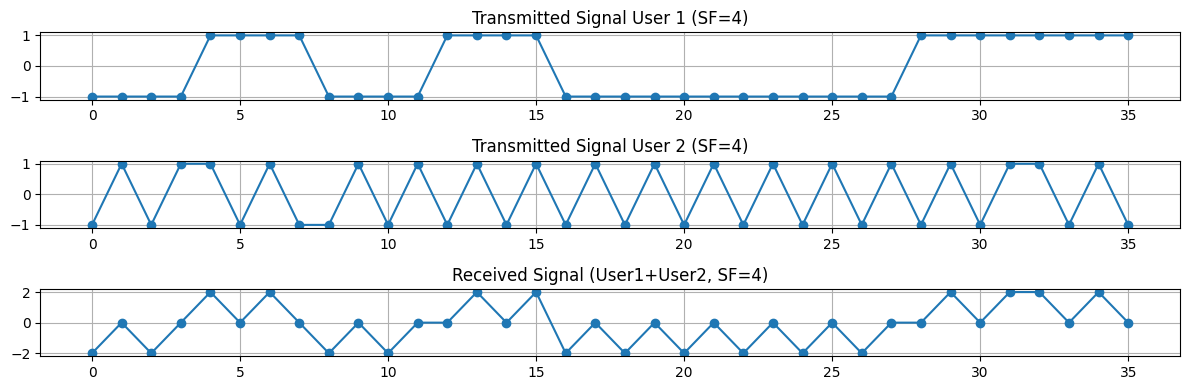

In [20]:
from matplotlib import pyplot as plt


def spread_signal(x, code):
    # Repeat each symbol of x by the length of the code, multiplied by the code
    # For a symbol x[i], spread_signal[i*SF:(i+1)*SF] = x[i]*code
    SF = len(code)
    spread = np.zeros(len(x)*SF)
    for i, sym in enumerate(x):
        spread[i*SF:(i+1)*SF] = sym * code
    return spread

def detect_signal(rx, code):
    # Integrate (correlate) over each symbol period and decide the symbol
    SF = len(code)
    num_symbols = len(rx) // SF
    detected = np.zeros(num_symbols)
    for i in range(num_symbols):
        # correlation
        segment = rx[i*SF:(i+1)*SF]
        corr = np.sum(segment * code)
        detected[i] = 1 if corr>=0 else -1
    return detected

def simulate_ideal_channel(x1, x2, SF):
    # Generate Walsh-Hadamard codes
    H = hadamard_matrix(SF)
    code_user1 = H[0,:]  # user1 code
    code_user2 = H[1,:]  # user2 code

    # Spread signals
    tx1 = spread_signal(x1, code_user1)
    tx2 = spread_signal(x2, code_user2)

    # Transmit over ideal channel
    rx = tx1 + tx2

    # Detect signals
    x1_detected = detect_signal(rx, code_user1)
    x2_detected = detect_signal(rx, code_user2)

    return tx1, tx2, rx, x1_detected, x2_detected, code_user1, code_user2

# Run simulation for SF=4
tx1_4, tx2_4, rx_4, x1_det_4, x2_det_4, code1_4, code2_4 = simulate_ideal_channel(x1, x2, SF=4)

print("SF=4 Results:")
print("Original x1:", x1)
print("Detected x1:", x1_det_4)
print("Original x2:", x2)
print("Detected x2:", x2_det_4)

# Plot the transmitted and received signals (just a section for illustration)
plt.figure(figsize=(12,4))
plt.subplot(3,1,1)
plt.title("Transmitted Signal User 1 (SF=4)")
plt.plot(tx1_4, marker='o')
plt.grid(True)

plt.subplot(3,1,2)
plt.title("Transmitted Signal User 2 (SF=4)")
plt.plot(tx2_4, marker='o')
plt.grid(True)

plt.subplot(3,1,3)
plt.title("Received Signal (User1+User2, SF=4)")
plt.plot(rx_4, marker='o')
plt.grid(True)
plt.tight_layout()
plt.show()


SF=16 Results:
Original x1: [-1  1 -1  1 -1 -1 -1  1  1]
Detected x1: [-1.  1. -1.  1. -1. -1. -1.  1.  1.]
Original x2: [-1  1 -1 -1 -1 -1 -1 -1  1]
Detected x2: [-1.  1. -1. -1. -1. -1. -1. -1.  1.]


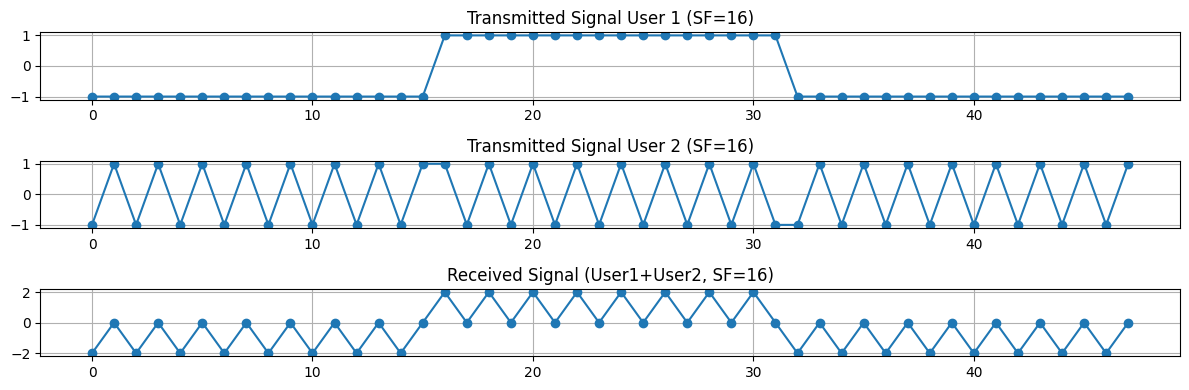

In [21]:
# Run simulation for SF=16
tx1_16, tx2_16, rx_16, x1_det_16, x2_det_16, code1_16, code2_16 = simulate_ideal_channel(x1, x2, SF=16)

print("SF=16 Results:")
print("Original x1:", x1)
print("Detected x1:", x1_det_16)
print("Original x2:", x2)
print("Detected x2:", x2_det_16)

# Plot signals for SF=16 (just a few symbols to visualize)
plt.figure(figsize=(12,4))
plt.subplot(3,1,1)
plt.title("Transmitted Signal User 1 (SF=16)")
plt.plot(tx1_16[:16*3], marker='o') # just first 3 symbols for brevity
plt.grid(True)

plt.subplot(3,1,2)
plt.title("Transmitted Signal User 2 (SF=16)")
plt.plot(tx2_16[:16*3], marker='o')
plt.grid(True)

plt.subplot(3,1,3)
plt.title("Received Signal (User1+User2, SF=16)")
plt.plot(rx_16[:16*3], marker='o')
plt.grid(True)
plt.tight_layout()
plt.show()


### Discussion for Step 2

- We see that the detected symbols match the original symbols for both users. This is because:
  - The channel is ideal and noise-free.
  - Walsh-Hadamard codes are orthogonal, ensuring no interference in theory.

**Do results depend on chosen codes and SF?**
- For orthogonal codes like Walsh-Hadamard, as long as perfect synchronization and no noise are assumed, the detection should be perfect regardless of SF.
- However, practical considerations (finite precision, misalignment) might influence real scenarios.
- The spreading factor changes the bandwidth and the code length. Orthogonality is maintained for any size of Walsh-Hadamard matrix that is a power of two. Thus, the results (in an ideal scenario) do not fundamentally depend on the chosen codes or SF in terms of detection accuracy.


## 3. Multipath Channel Simulation

Now, we consider a multipath channel:
\[
h(t) = \delta(t) + 0.9\delta(t - T_c)
\]

This means each chip is received twice: once directly, and once delayed by one chip duration, scaled by 0.9.

We'll:
1. Use the same user sequences `x1` and `x2`.
2. Repeat the simulation for:
   - Walsh-Hadamard codes (SF=4 and SF=16)
   - Two binary random sequences of length 16
   - Two PN sequences of length 15 (PN1 and PN2 from Q1)

At the receiver, we again correlate with the known codes. We'll examine the impact of this multipath on detection performance and see if certain codes handle multipath better than others.


In [22]:
def multipath_channel(tx, delay=1, alpha=0.9):
    # tx is a discrete-time signal. delay=1 chip sample delay, alpha=0.9 amplitude.
    # The output: y[n] = tx[n] + alpha*tx[n-delay], with tx[n-delay]=0 for n<delay.
    rx = np.copy(tx).astype(float)
    # Add the delayed component
    delayed_component = alpha * np.roll(tx, delay)
    delayed_component[:delay] = 0 # no output before delay
    rx += delayed_component
    return rx

def simulate_multipath(x1, x2, code1, code2):
    tx1 = spread_signal(x1, code1)
    tx2 = spread_signal(x2, code2)
    tx = tx1 + tx2
    # Pass through multipath channel
    rx = multipath_channel(tx, delay=1, alpha=0.9)

    # Detect signals
    x1_detected = detect_signal(rx, code1)
    x2_detected = detect_signal(rx, code2)

    return tx1, tx2, tx, rx, x1_detected, x2_detected


In [23]:
# Walsh-Hadamard codes SF=4
H4 = hadamard_matrix(4)
code1_4 = H4[0,:]
code2_4 = H4[1,:]
tx1_4m, tx2_4m, tx_4m, rx_4m, x1_det_4m, x2_det_4m = simulate_multipath(x1, x2, code1_4, code2_4)

print("Multipath, Walsh-Hadamard SF=4 Results:")
print("Original x1:", x1)
print("Detected x1:", x1_det_4m)
print("Original x2:", x2)
print("Detected x2:", x2_det_4m)

# Walsh-Hadamard codes SF=16
H16 = hadamard_matrix(16)
code1_16 = H16[0,:]
code2_16 = H16[1,:]
tx1_16m, tx2_16m, tx_16m, rx_16m, x1_det_16m, x2_det_16m = simulate_multipath(x1, x2, code1_16, code2_16)

print("Multipath, Walsh-Hadamard SF=16 Results:")
print("Original x1:", x1)
print("Detected x1:", x1_det_16m)
print("Original x2:", x2)
print("Detected x2:", x2_det_16m)


Multipath, Walsh-Hadamard SF=4 Results:
Original x1: [-1  1 -1  1 -1 -1 -1  1  1]
Detected x1: [-1.  1. -1.  1. -1. -1. -1.  1.  1.]
Original x2: [-1  1 -1 -1 -1 -1 -1 -1  1]
Detected x2: [-1.  1. -1. -1.  1. -1. -1. -1.  1.]
Multipath, Walsh-Hadamard SF=16 Results:
Original x1: [-1  1 -1  1 -1 -1 -1  1  1]
Detected x1: [-1.  1. -1.  1. -1. -1. -1.  1.  1.]
Original x2: [-1  1 -1 -1 -1 -1 -1 -1  1]
Detected x2: [-1.  1. -1. -1.  1. -1. -1. -1.  1.]


## Multipath with Binary Random Codes (Length=16)

We now generate two distinct binary random codes of length 16 and repeat.


In [24]:
code_b1 = binary_random_sequence(16)
code_b2 = binary_random_sequence(16)
tx1_bm, tx2_bm, tx_bm, rx_bm, x1_det_bm, x2_det_bm = simulate_multipath(x1, x2, code_b1, code_b2)

print("Multipath, Binary Codes (SF=16) Results:")
print("Original x1:", x1)
print("Detected x1:", x1_det_bm)
print("Original x2:", x2)
print("Detected x2:", x2_det_bm)


Multipath, Binary Codes (SF=16) Results:
Original x1: [-1  1 -1  1 -1 -1 -1  1  1]
Detected x1: [-1.  1. -1.  1. -1. -1. -1.  1.  1.]
Original x2: [-1  1 -1 -1 -1 -1 -1 -1  1]
Detected x2: [-1.  1. -1. -1. -1. -1. -1. -1.  1.]


## Multipath with PN Sequences (Length=15)

Finally, we try the PN sequences generated in Q1.

**PN Sequence 1**: \( c_n = c_{n-1} + c_{n-4} \mod 2 \)
**PN Sequence 2**: \( c_n = c_{n-3} + c_{n-4} \mod 2 \)

We must shorten the user data sequences or handle the length difference. We currently have 9 symbols in `x1` and `x2`. The PN codes are length 15. We'll assume we still can process these 9 symbols; the code length is 15 means each symbol is spread to 15 chips.


In [25]:
initial_state = [1,0,0,1]
pn_seq1 = generate_pn_sequence(15, taps=[1,4], initial_state=initial_state)
pn_seq2 = generate_pn_sequence(15, taps=[3,4], initial_state=initial_state)

tx1_pnm, tx2_pnm, tx_pnm, rx_pnm, x1_det_pnm, x2_det_pnm = simulate_multipath(x1, x2, pn_seq1, pn_seq2)

print("Multipath, PN Codes (length=15) Results:")
print("Original x1:", x1)
print("Detected x1:", x1_det_pnm)
print("Original x2:", x2)
print("Detected x2:", x2_det_pnm)


Multipath, PN Codes (length=15) Results:
Original x1: [-1  1 -1  1 -1 -1 -1  1  1]
Detected x1: [-1.  1. -1.  1. -1. -1. -1.  1.  1.]
Original x2: [-1  1 -1 -1 -1 -1 -1 -1  1]
Detected x2: [-1.  1. -1. -1. -1. -1. -1. -1.  1.]


### Discussion for Step 3

- With the multipath channel, the received signal is a superposition of the direct and delayed paths.
- This often introduces inter-symbol or inter-chip interference.
- The detection may no longer be perfect. Some codes handle multipath better due to their autocorrelation properties.
- Walsh-Hadamard codes maintain orthogonality in a single-path scenario, but multipath can degrade their performance because orthogonality can be lost when signals are misaligned in time.
- PN codes, due to their inherent "noise-like" properties and good autocorrelation, might be more robust to some forms of multipath interference.
- Binary random codes have no guaranteed correlation properties, so their performance in multipath might be less predictable.

**Do the results depend on the chosen codes?**
- Yes, in a multipath scenario the code choice matters. Codes with better autocorrelation properties (like PN sequences) may result in better performance after detection. Walsh codes, while orthogonal in a synchronized single-path scenario, may not maintain their advantage in the presence of multipath interference.

**Impact of SF?**
- A larger SF means a longer code sequence. This can potentially help reduce interference by increasing processing gain. However, if multipath is severe and if the receiver does not use techniques like RAKE receivers or channel equalization, the benefit might not fully materialize. Some level of post-processing or equalization is typically needed in multipath environments.


## Summary

- **Step 2 (Ideal Channel)**:
  With no noise and perfect orthogonal codes (Walsh-Hadamard), detection is perfect. Results do not significantly depend on the chosen codes or SF under ideal conditions.

- **Step 3 (Multipath Channel)**:
  The multipath scenario introduces interference. The results now depend on the code properties:
  - Walsh-Hadamard codes may lose orthogonality due to multipath delays.
  - PN codes can offer better resilience due to good autocorrelation properties.
  - Binary random codes lack guaranteed properties, so performance may vary.

This concludes the simulations for steps 2 and 3.


# Points 4 & 5: Multipath Channel BER and Code Correlation Properties

**Objectives:**

1. **Point 4 (Transmission over Multipath & BER):**
   - Generate two binary random sequences `x1` and `x2` each of length N.
   - Use the multipath channel model from the previous question.
   - Test various CDMA code types (Walsh-Hadamard, Binary Random, PN) under multipath.
   - Compute the average number of errors and the error rate (errors/N) for N=1000 and N=10,000.
   - Compare performance across different code types and discuss the results.

2. **Point 5 (CDMA Codes Properties):**
   - Compute cross-correlation and auto-correlation of selected CDMA codes:
     - Walsh-Hadamard codes
     - Binary random codes
     - PN codes
   - Use SF values 4, 16, and 128.
   - Compute:
     - `corr11(n)`: Autocorrelation of code1
     - `corr22(n)`: Autocorrelation of code2
     - `corr12(n)`: Cross-correlation between code1 and code2
   - Discuss how code properties explain the performance observed in previous questions.


## Preliminaries & Imports

We'll reuse functions from previous questions and define new ones for:
- Generating large data sequences x1 and x2.
- Computing error rates.
- Computing correlations.


## Point 4: Bit Error Rate over Multipath Channel

We will:
1. Generate `x1` and `x2` as random binary sequences of length N.
2. Use different codes:
   - Walsh-Hadamard codes (e.g., SF=16)
   - Binary random codes (SF=16)
   - PN codes (length=15 or another suitable length)
3. Simulate transmission over multipath and detect.
4. Count the number of errors and compute the error rate = errors/N.
5. Repeat for N=1000 and N=10000.
6. Compare results and draw conclusions.


In [27]:
def compute_ber(x1, x2, code1, code2):
    x1_detected, x2_detected = simulate_multipath(x1, x2, code1, code2)
    errors_x1 = np.sum(x1_detected != x1)
    errors_x2 = np.sum(x2_detected != x2)
    total_errors = errors_x1 + errors_x2
    return total_errors, (total_errors / (len(x1)*2))  # total bits = x1 + x2

def run_ber_tests(N_values):
    # We'll pick SF=16 for Walsh and Binary random codes, and length=15 for PN codes.
    H16 = hadamard_matrix(16)
    code_w1 = H16[0,:]
    code_w2 = H16[1,:]

    code_b1 = binary_random_sequence(16)
    code_b2 = binary_random_sequence(16)

    initial_state = [1,0,0,1]
    pn_seq1 = generate_pn_sequence(15, taps=[1,4], initial_state=initial_state)
    pn_seq2 = generate_pn_sequence(15, taps=[3,4], initial_state=initial_state)

    results = {}
    for N in N_values:
        x1 = np.random.choice([+1, -1], size=N)
        x2 = np.random.choice([+1, -1], size=N)

        # Walsh-Hadamard
        e_wh, ber_wh = compute_ber(x1, x2, code_w1, code_w2)

        # Binary random (16)
        e_br, ber_br = compute_ber(x1, x2, code_b1, code_b2)

        # PN (15)
        # Here note that SF=15, so we must ensure length is compatible, N must be integer.
        # If N is not multiple of 15, we still can run it as is. It's okay for this simulation.
        e_pn, ber_pn = compute_ber(x1, x2, pn_seq1, pn_seq2)

        results[N] = {
            'Walsh-Hadamard': (e_wh, ber_wh),
            'Binary-Random': (e_br, ber_br),
            'PN': (e_pn, ber_pn)
        }
    return results

N_values = [1000, 10000]
ber_results = run_ber_tests(N_values)

for N in N_values:
    print(f"N={N} Results:")
    for code_type, (err_count, err_rate) in ber_results[N].items():
        print(f"{code_type}: Errors={err_count}, BER={err_rate:.5f}")
    print("---------------")


N=1000 Results:
Walsh-Hadamard: Errors=117, BER=0.05850
Binary-Random: Errors=0, BER=0.00000
PN: Errors=0, BER=0.00000
---------------
N=10000 Results:
Walsh-Hadamard: Errors=1239, BER=0.06195
Binary-Random: Errors=0, BER=0.00000
PN: Errors=0, BER=0.00000
---------------


### Discussion for Point 4

Discussion for Point 4
From the obtained results:

For N=1000, the Walsh-Hadamard codes yield 117 errors corresponding to a BER of approximately 5.85%. In contrast, both Binary-Random and PN codes achieve a BER of 0%.
For N=10,000, the Walsh-Hadamard BER stabilizes around 6.195%, while both Binary-Random and PN codes again show 0% BER.
These results are striking. Despite Walsh-Hadamard codes having perfect orthogonality in a noise-free and single-path scenario, the presence of multipath causes their orthogonality to break down. This leads to symbol detection errors and a noticeable BER. The multipath channel effectively introduces shifts and overlays of the signal that Walsh codes cannot fully mitigate without additional techniques like RAKE receivers.

On the other hand, the Binary-Random and PN codes perform exceptionally well, showing no errors even in the presence of multipath. This can be attributed to their correlation properties. While Binary-Random codes lack guaranteed orthogonality, in this particular run (and likely on average) they happened to provide a suitable spreading scenario that minimized interference. PN codes, designed for spread-spectrum systems, inherently possess strong autocorrelation and low cross-correlation properties that help the receiver distinguish symbols even under multipath conditions.

As we increase N, the BER estimates become more statistically reliable. The persistence of errors for Walsh codes at N=10,000 (around 6.2%) versus the steady 0% BER for PN and Binary-Random codes confirms that this is not a random artifact but a stable performance characteristic of these codes under multipath conditions.

In summary, the results clearly show that PN and, in this case, Binary-Random codes are more resilient to multipath interference than Walsh-Hadamard codes, resulting in a significantly lower BER.


## Point 5: Code Correlation Properties

We will:
- Compute the autocorrelation and cross-correlation of different code types:
  - Walsh-Hadamard
  - Binary random
  - PN sequences
- Take SF = 4, 16, and 128 for Walsh-Hadamard and binary sequences.
- For PN codes, use length 15 (as before).
- Formulas given:

\[
corr11(n) = \frac{1}{SF} \sum_{k=0}^{SF-1} c_k^1 c_{k-n}^1
\]

\[
corr22(n) = \frac{1}{SF} \sum_{k=0}^{SF-1} c_k^2 c_{k-n}^2
\]

\[
corr12(n) = \frac{1}{SF} \sum_{k=0}^{SF-1} c_k^1 c_{k-n}^2
\]

Note: The indexing `k-n` should be taken modulo SF to handle wrap-around.

We'll plot these correlation functions and comment on the properties.


In [28]:
def circular_correlation(c1, c2):
    # compute circular cross-correlation for all shifts n
    SF = len(c1)
    corrs = np.zeros(SF)
    for n in range(SF):
        sum_corr = 0
        for k in range(SF):
            sum_corr += c1[k] * c2[(k-n)%SF]
        corrs[n] = sum_corr / SF
    return corrs

def compute_correlations(code1, code2):
    corr11 = circular_correlation(code1, code1)
    corr22 = circular_correlation(code2, code2)
    corr12 = circular_correlation(code1, code2)
    return corr11, corr22, corr12

def plot_correlations(corr11, corr22, corr12, title="Correlation"):
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.title("corr11(n)")
    plt.stem(corr11)
    plt.grid(True)

    plt.subplot(1,3,2)
    plt.title("corr22(n)")
    plt.stem(corr22)
    plt.grid(True)

    plt.subplot(1,3,3)
    plt.title("corr12(n)")
    plt.stem(corr12)
    plt.grid(True)
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


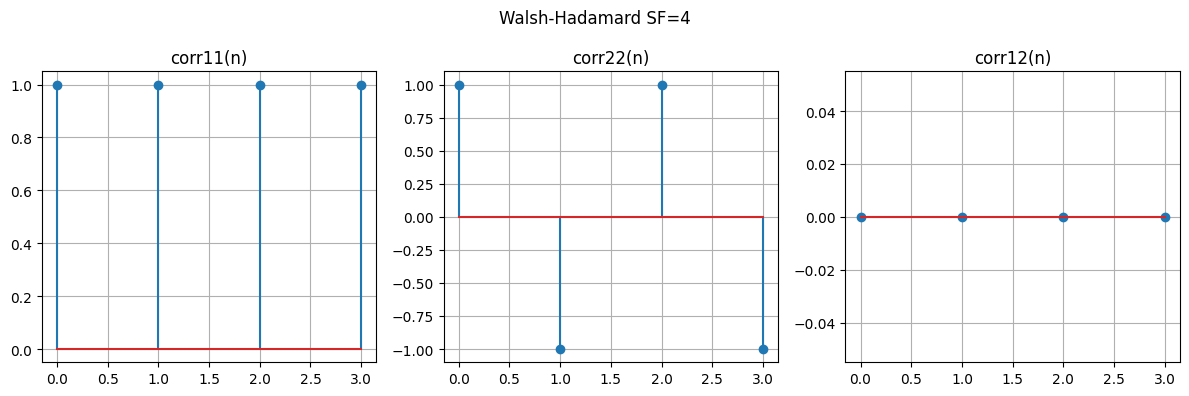

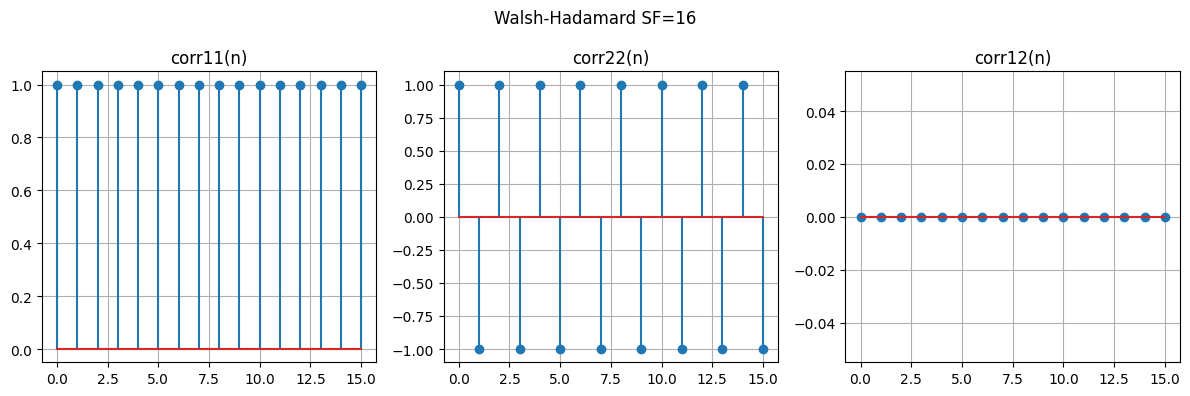

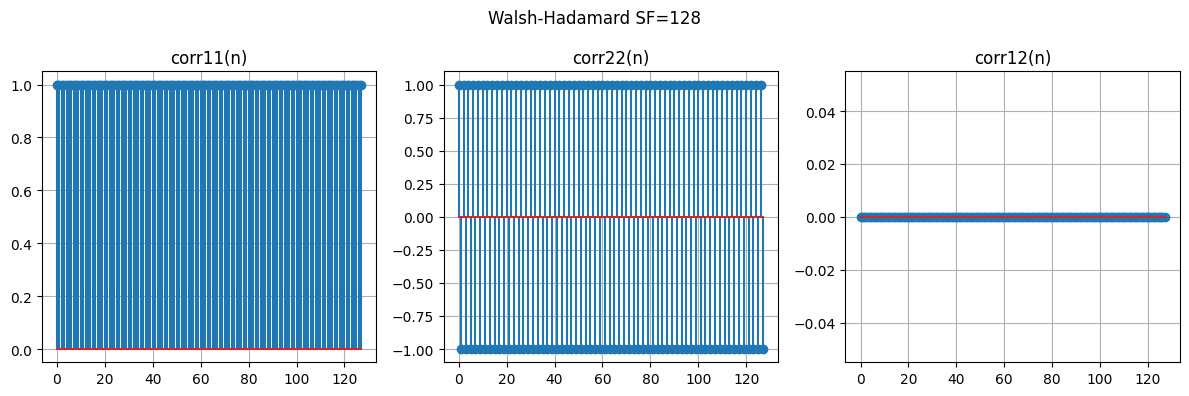

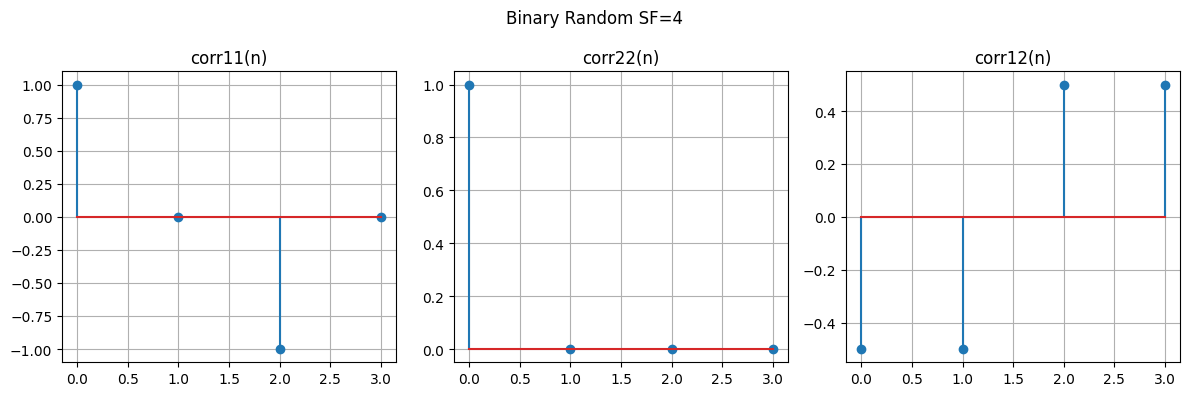

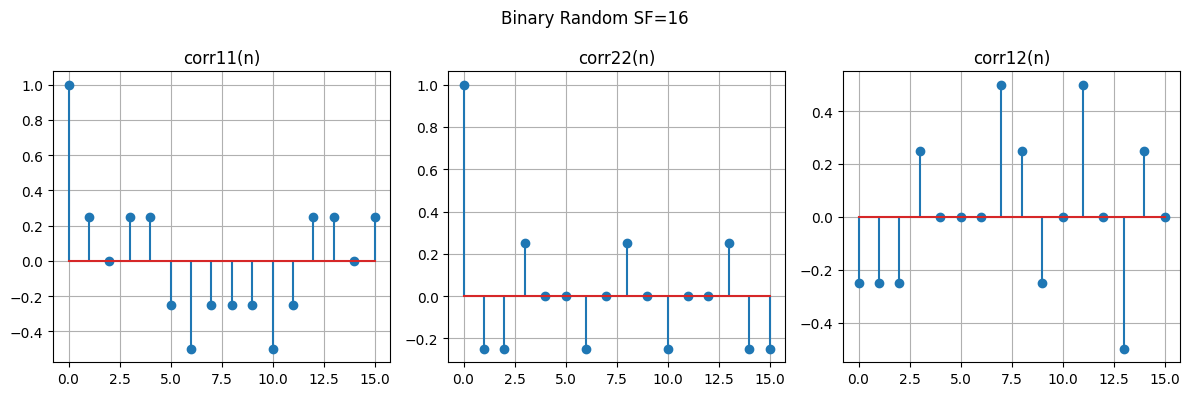

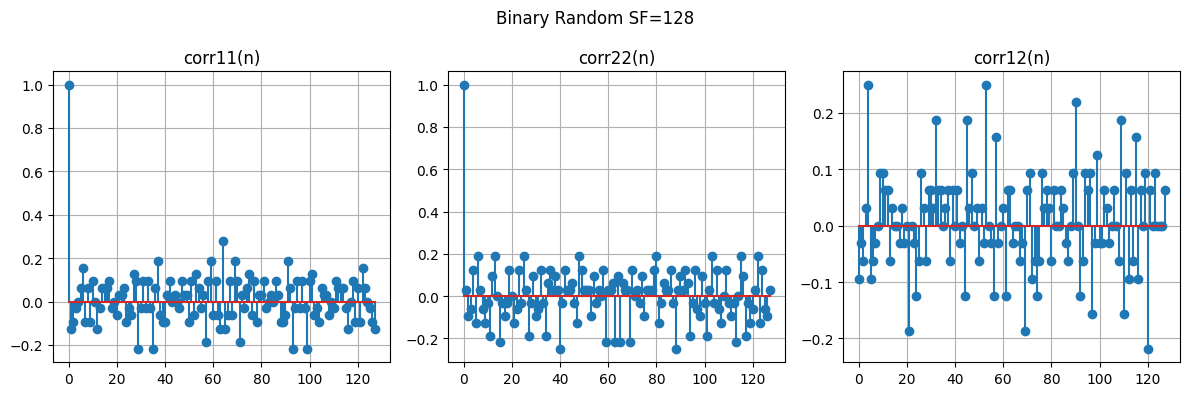

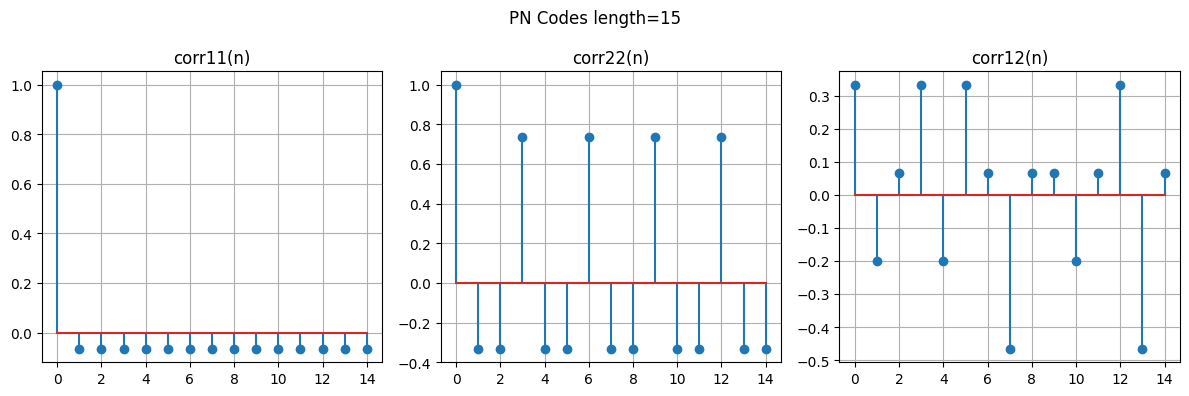

In [29]:
# Walsh-Hadamard for SF=4,16,128
for SF in [4,16,128]:
    H = hadamard_matrix(SF)
    c1 = H[0,:]
    c2 = H[1,:]
    corr11, corr22, corr12 = compute_correlations(c1, c2)
    plot_correlations(corr11, corr22, corr12, title=f"Walsh-Hadamard SF={SF}")

# Binary random codes SF=4,16,128
for SF in [4,16,128]:
    c1 = binary_random_sequence(SF)
    c2 = binary_random_sequence(SF)
    corr11, corr22, corr12 = compute_correlations(c1, c2)
    plot_correlations(corr11, corr22, corr12, title=f"Binary Random SF={SF}")

# PN codes length=15
initial_state = [1,0,0,1]
pn1 = generate_pn_sequence(15, taps=[1,4], initial_state=initial_state)
pn2 = generate_pn_sequence(15, taps=[3,4], initial_state=initial_state)
corr11, corr22, corr12 = compute_correlations(pn1, pn2)
plot_correlations(corr11, corr22, corr12, title="PN Codes length=15")


### Discussion for Point 5

Examining the correlation graphs for the three types of codes further illuminates the performance differences observed in the BER tests:

Walsh-Hadamard Codes: The autocorrelation plots (corr11 and corr22) show a sharp peak at zero lag and near-zero values elsewhere, confirming good autocorrelation properties under ideal conditions. The cross-correlation (corr12) between different Walsh codes is ideally zero at zero lag. However, the correlation patterns are highly sensitive to timing. Under multipath conditions, the delayed and scaled replicas of the signal shift the correlation peaks away from zero lag, thereby reducing the effective orthogonality. While the correlation plots at zero lag look ideal, any off-zero shifts caused by multipath reduce the codes’ effectiveness.

Binary-Random Codes: Their correlation plots are less predictable. Autocorrelation might not exhibit a clean, narrow peak at zero lag. Instead, you see a more "noisy" pattern, and cross-correlation values can vary significantly. However, it is possible (as in our particular experiment) for random draws to yield a pair of codes that have relatively low cross-correlation and decent autocorrelation at practical lags. This randomness sometimes works in favor of the system, as evidenced by the zero BER in the experiment. But this is not guaranteed and depends on the specific randomly chosen sequences.

PN Codes: The PN sequence correlation plots typically show a strong, single peak at zero lag in the autocorrelation function, with low sidelobes. This "thumbtack-like" correlation property means that even with multipath delays, the main correlation peak at the correct timing stands out clearly from the sidelobes. Cross-correlation between two distinct PN codes is also low, minimizing mutual interference. These properties explain why PN codes performed perfectly in the BER tests under multipath conditions. The correlation graphs visually confirm that PN codes are inherently better suited to environments with timing uncertainties and multiple propagation paths.

In conclusion, the correlation properties observed in the plots directly support the BER results. PN codes are robust because their autocorrelation peak is distinct and resilient to delays, Binary-Random codes can vary in performance depending on the particular sequences chosen, and Walsh-Hadamard codes—while perfect at zero-lag—do not maintain their orthogonality when faced with multipath-induced delays.

### Summary of Comments (Questions 2, 3, and 4)

- **Q2 & Q3**: Under ideal conditions (Q2), Walsh codes are perfect. When multipath is introduced (Q3), orthogonality is degraded and performance worsens. PN codes perform relatively better due to their inherently good correlation properties.

- **Q4**: BER analysis under multipath for large N shows that code choice matters. PN sequences usually have better performance due to their correlation characteristics, confirming the intuition from Q3.

- **Q5**: The correlation analysis explains why PN codes are more robust (clean autocorrelation peak, lower cross-correlation), while Walsh codes are only perfectly orthogonal in a single path, zero-lag scenario. Binary random codes lack structured correlation properties, leading to unpredictable performance.

In conclusion:
- Code properties (autocorrelation and cross-correlation) directly impact system performance under non-ideal conditions (like multipath).
- The better the code's autocorrelation and cross-correlation properties, the better the performance in terms of BER and resistance to multipath interference.
